# Advanced Regression 

- Simple Linear Regression
- Multiple Linear Regression
- Data Transformation 
- Polynomial Regression

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 1.1 Simple Linear Regression

#### We will build a model using TV spend on advertisements to predict sales

In [6]:
df=pd.read_csv("advertising.csv")

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data=df[["TV", "Sales"]]
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


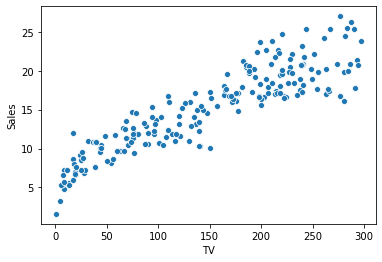

In [10]:
sns.scatterplot(data=data, x="TV", y="Sales")

In [12]:
#Splitting the dataset into X and y
X=np.array(data["TV"]).reshape(-1,1) #predictor variable
y=np.array(data["Sales"]).reshape(-1,1) #response variable

In [14]:
#Building the regression
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [17]:
#Predictions on the basis of model
y_pred=reg.predict(X)
y_pred.shape

(200, 1)

In [20]:
#Find the value of R-squared
r2_score(y, y_pred)

0.8121757029987414

The advertising spends on TV explain about 81.21% of the variation in the Sales

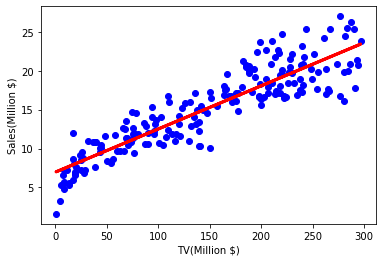

In [21]:
#Visualizing the model fit
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red", linewidth=3)
plt.xlabel("TV(Million $)")
plt.ylabel("Sales(Million $)")

plt.show()

In [22]:
#Model Coefficients: beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[6.97482149]
[[0.05546477]]


In [25]:
#Metrics to assess model performance
rss=np.sum(np.square(y-y_pred)) # sum of the squared difference between the actual and the predicted values
print(rss)
mse=mean_squared_error(y, y_pred) # MSE is RSS divided by the number of observations
print(mse)
rmse=mse**0.5 # RMSE is square root of MSE
print(rmse)

1043.5487795590257
5.2177438977951285
2.2842381438447106


#### Checking Assumptions 

In [23]:
#Residuals Analysis
y_res=y-y_pred

In [24]:
y_res.shape

(200, 1)

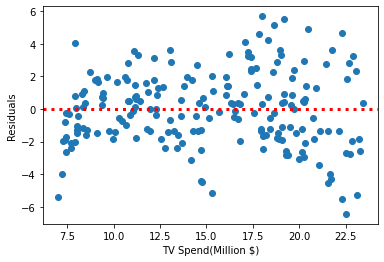

In [27]:
#Residuals analysis vs Predictions plots
data['res']=y_res
plt.scatter(y_pred, data['res'])
plt.axhline(y=0, color='r', linestyle=':', linewidth=3)
plt.xlabel("TV Spend(Million $)")
plt.ylabel("Residuals")
plt.show()

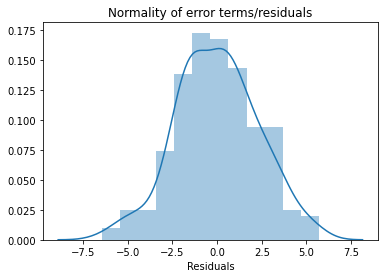

In [29]:
#Distributions of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()


### Normal Equations

#### Regression Equation
$\hat{y_i} = b_{0} + b_{1}{x_i}$<br>
where slope of trend line is calculated as:<br>
$b_{1}=\frac{\sum (x_i-\bar{x})*(y_i-\bar{y})}{\sum (x_i-\bar{x})^{2}}$<br>
and the intercept is computed as:<br>
$b_{0}=\bar{y}-b_{1}\bar{x}$

In [30]:
#Computing X and Y
X=data["TV"].values #advertising spend on tv
Y=data["Sales"].values #sales

In [33]:
#Mean of X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)

#Total number of values
n=len(X)

In [34]:
#using the formula to calculate: b0 and b1
numer=0
denom=0
for i in range(n):   # for each observation in the data
    numer += (X[i] - mean_x) * (Y[i] - mean_y)  # compute the expression and sum over all observations using for loop
    denom += (X[i] - mean_x)**2
b1= numer/denom
b0= mean_y - (b1*mean_x)

print("Coefficients")
print(b0, b1)

Coefficients
6.974821488229903 0.05546477046955879


### Linear Regression Model Estimates using Matrix Multiplications

$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [35]:
# We use NumPy’s vstack to create a 2-d numpy array from two 1d-arrays and create X_mat
X_mat=np.vstack((np.ones(len(X)), X)).T

In [36]:
X_mat

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [37]:
Y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [39]:
# We can implement this using NumPy’s linalg module’s matrix inverse function and matrix multiplication function.
beta_hat=np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

In [40]:
beta_hat

array([6.97482149, 0.05546477])

# 1.2 Multiple Linear Regression

#### We predict the sales based on the expenditure on TV, Radio and Newspaper advertisements

In [3]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data=df

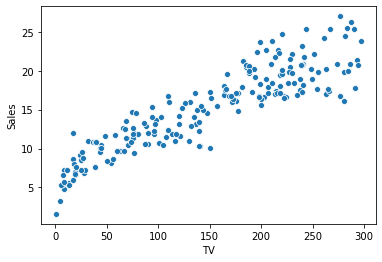

In [6]:
#plotting 
sns.scatterplot(data=data, x="TV", y="Sales")

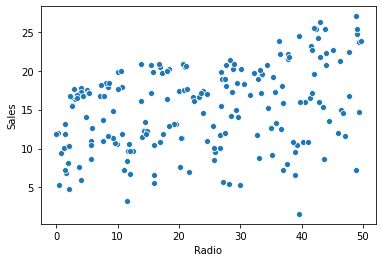

In [7]:
sns.scatterplot(data=data, x="Radio", y="Sales")

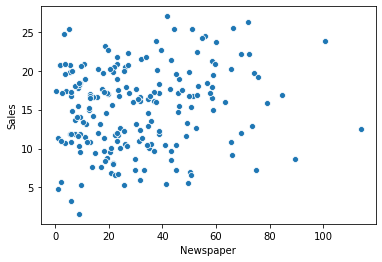

In [8]:
sns.scatterplot(data=data, x="Newspaper", y="Sales")

In [9]:
#Splitting the dataset into X and y
X=data[["TV", "Radio", "Newspaper"]]
y=np.array(data["Sales"]).reshape(-1,1)

In [11]:
#Build the regression model
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [12]:
#Predictions on the basis of model
y_pred=reg.predict(X)

In [13]:
#Value of R-squared
r2_score(y, y_pred)

0.9025912899684558

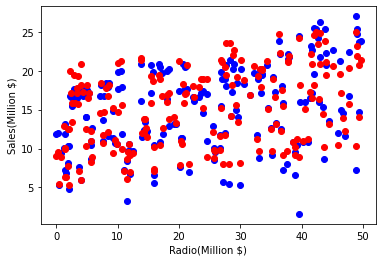

In [14]:
# Visual comparison between predicted and actual values
plt.scatter(X["Radio"], y, color="blue") #actual predict
plt.scatter(X["Radio"], y_pred, color="red") #predicted_value
plt.xlabel("Radio(Million $)")
plt.ylabel("Sales(Million $)")
plt.show()

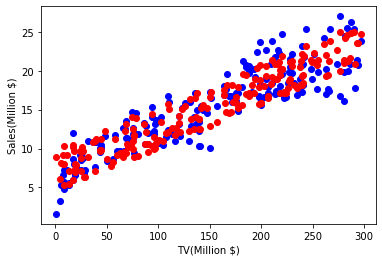

In [15]:
plt.scatter(X["TV"], y, color="blue") #actual predict
plt.scatter(X["TV"], y_pred, color="red") #predicted_value
plt.xlabel("TV(Million $)")
plt.ylabel("Sales(Million $)")
plt.show()

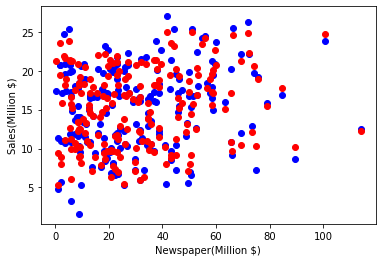

In [16]:
plt.scatter(X["Newspaper"], y, color="blue") #actual predict
plt.scatter(X["Newspaper"], y_pred, color="red") #predicted_value
plt.xlabel("Newspaper(Million $)")
plt.ylabel("Sales(Million $)")
plt.show()

In [17]:
#calculate beta coefficients
print(reg.intercept_)
print(reg.coef_)

[4.62512408]
[[0.05444578 0.10700123 0.00033566]]


In [19]:
# Metrics to give an overall sense of error in the model
rss=np.sum(np.square(y-y_pred))
print(rss)
mse=mean_squared_error(y, y_pred)
print(mse)
rmse=mse**0.5
print(rmse)

541.2012295254631
2.706006147627315
1.6449942697855562


In [20]:
#Residuals analysis
y_res=y-y_pred

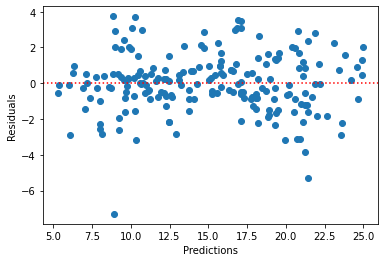

In [21]:
data['res']=y_res
plt.scatter(y_pred, data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

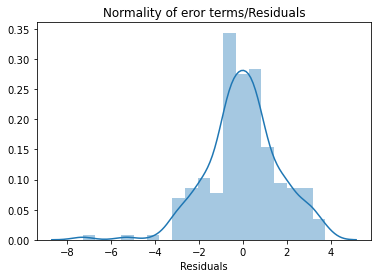

In [23]:
#Distributions of error
p=sns.distplot(y_res, kde=True)
p=plt.title("Normality of eror terms/Residuals")
plt.xlabel("Residuals")
plt.show()

### Multiple Linear Regression Model Estimates using Matrix Multiplications

In [27]:
# We use NumPy’s vstack to create a 2-d numpy array from two 1d-arrays and create X_mat.
X_mat=np.vstack((np.ones(len(X)), X.T)).T

In [29]:
#X_mat

#### $\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [30]:
# We can implement this using NumPy’s linalg module’s matrix inverse function and matrix multiplication function.
beta_hat=np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

In [31]:
beta_hat

array([[4.62512408e+00],
       [5.44457803e-02],
       [1.07001228e-01],
       [3.35657922e-04]])

In [34]:
beta_hat_list=[beta_hat[i][0] for i in range(len(beta_hat))]
coefficients=['b0', 'b1(TV)', 'b2(Radio)', 'b3(Newspaper)']
betas=dict(zip(coefficients, beta_hat_list))

In [35]:
betas

{'b0': 4.625124078808635,
 'b1(TV)': 0.054445780337570915,
 'b2(Radio)': 0.10700122823870348,
 'b3(Newspaper)': 0.00033565792233057265}

## Modeling non-linear relationships using data transformation

Here, we need to make a model which predicts how much distance is covered by a truck in a given time unit after a break is applied

In [36]:
time=pd.read_csv("AR - Examples - 1.5.csv")

In [37]:
time.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


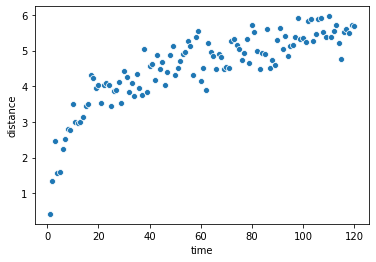

In [38]:
sns.scatterplot(data=time, x="time", y="distance")

Relationship is not linear


In [41]:
#splitting the relationship between X and y
X=np.array(time[["time"]]).reshape(-1,1)
y=np.array(time[["distance"]]).reshape(-1,1)

In [42]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [43]:
# Predictions on the basis of the model
y_pred=model.predict(X)

In [44]:
r2_score(y, y_pred)

0.7019700219367477

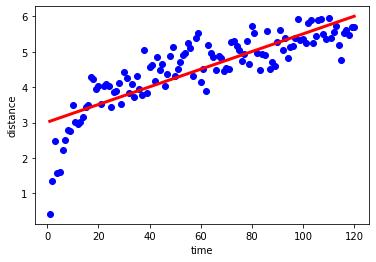

In [46]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel("time")
plt.ylabel("distance")
plt.show()

In [47]:
#calculate the beta0 and beta1
print(model.intercept_)
print(model.coef_)

[3.01233335]
[[0.02494362]]


In [48]:
# Metrics to give an overall sense of error in the model
rss=np.sum(np.square(y-y_pred))
print(rss)
mse=mean_squared_error(y, y_pred)
print(mse)
rmse=mse**0.5
print(rmse)

38.03580844870773
0.3169650704058978
0.5629965101187553


In [49]:
#Residual analysis
y_res=y-y_pred

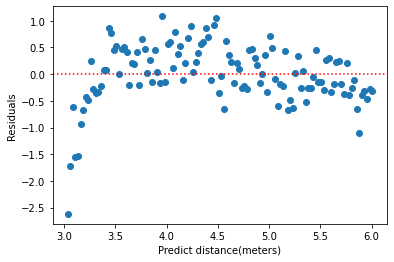

In [50]:
#Residuals plotting
plt.scatter(y_pred, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predict distance(meters)")
plt.ylabel("Residuals")
plt.show()

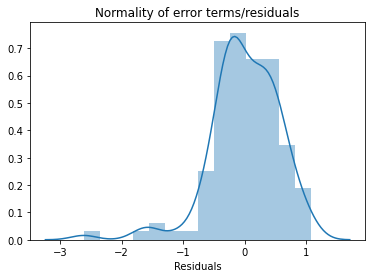

In [52]:
#Distribution of errors
p=sns.distplot(y_res, kde=True)
p=plt.title("Normality of error terms/residuals")
plt.xlabel("Residuals")
plt.show()

The distribution plot is not clear about the residuals, so we can data transformation for better results

In [53]:
# As we can see that the residuals do not fulfill the conditions for linear regression, Lets see if we can make some changes so that the residuals are normally distributed.
time["time(second)(log)"] = np.log(time['time'])

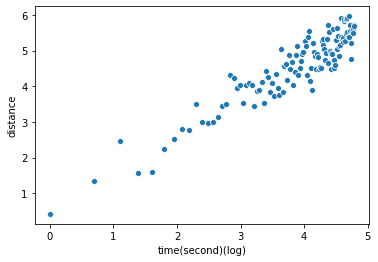

In [55]:
sns.scatterplot(data=time, x='time(second)(log)', y='distance')

In [56]:
#Splitting the dataset into X and y
X=np.array(time[["time(second)(log)"]]).reshape(-1, 1)
y=np.array(time[['distance']]).reshape(-1, 1)

In [57]:
#Build the regression model
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [58]:
# Predictions on the basis of the model
y_pred=model.predict(X)

In [59]:
r2_score(y, y_pred)

0.8717123012103078

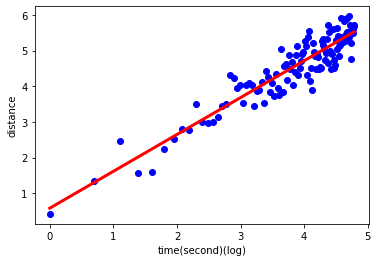

In [62]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel("time(second)(log)")
plt.ylabel("distance")
plt.show()

In [63]:
#calclate the beta0 and beta1
print(model.intercept_)
print(model.coef_)

[0.58066733]
[[1.03293534]]


In [64]:
# Metrics to give an overall sense of error in the model
rss=np.sum(np.square(y-y_pred))
print(rss)
mse=mean_squared_error(y, y_pred)
print(mse)
rmse=mse**0.5
print(rmse)

16.37260241134079
0.13643835342783991
0.36937562646693395


In [65]:
#residuals
y_res= y-y_pred

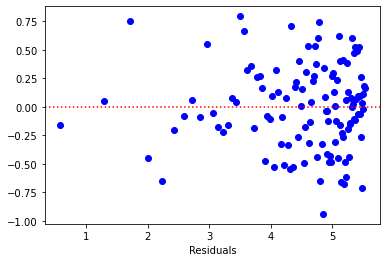

In [66]:
#Residuals plotting
plt.scatter(y_pred, y_res, color='blue')
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Residuals")
plt.show()

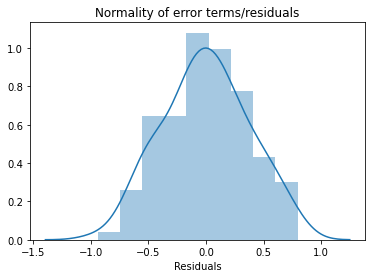

In [67]:
#distributions of errors
p= sns.distplot(y_res, kde=True)
p=plt.title("Normality of error terms/residuals")
plt.xlabel("Residuals")
plt.show()

Now, the residuals are equaly distributed.

### Modeling non-linear relationship using Polynomial Regression

In [3]:
# Model to predict marks given the number of courses taken and the time the student gives to study 
# on a daily basis.
data=pd.read_csv("AR - Examples - 1.6.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


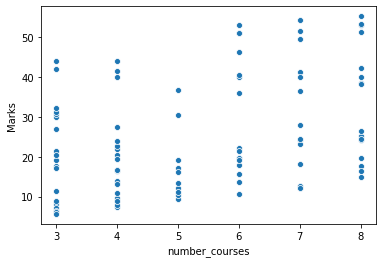

In [4]:
sns.scatterplot(data=data, x="number_courses", y="Marks")

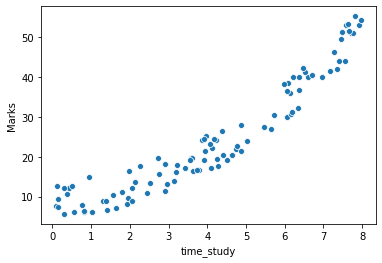

In [6]:
sns.scatterplot(data=data, x="time_study", y="Marks")

In [7]:
#Splitting the dataset into X and y
X=data[["number_courses", "time_study"]]
y=np.array(data[["Marks"]]).reshape(-1,1)

In [8]:
#Building the model
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
#Prediction on the basis of model
y_pred=reg.predict(X)

In [10]:
#Find the value R-Squared
r2_score(y, y_pred)

0.9403656320238896

In [11]:
#Calculate the beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[-7.45634623]
[[1.86405074 5.39917879]]


In [12]:
# Metrics to give an overall sense of error in the model
rss=np.sum(np.square(y-y_pred))
print(rss)
mse=mean_squared_error(y, y_pred)
print(mse)
rmse=mse**0.5
print(rmse)

1211.6962069108952
12.116962069108952
3.4809426983374707


In [13]:
#Residuals analysis
y_res=y-y_pred

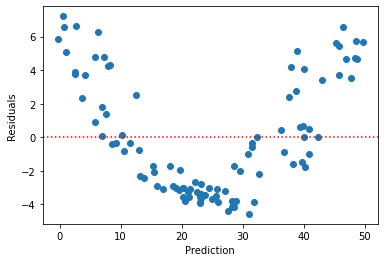

In [14]:
data['res']=y_res
plt.scatter(y_pred, data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

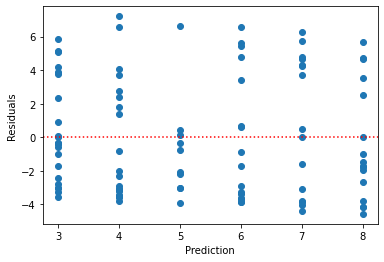

In [15]:
plt.scatter(data['number_courses'], data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

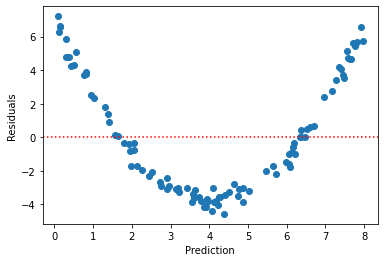

In [16]:
plt.scatter(data['time_study'], data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

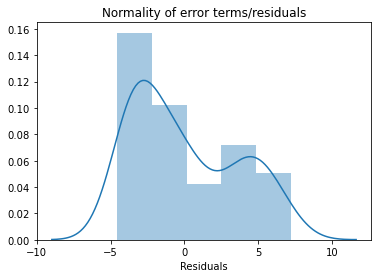

In [17]:
#distribution of errors
p=sns.distplot(y_res, kde=True)
p=plt.title("Normality of error terms/residuals")
plt.xlabel("Residuals")
plt.show()

### Fitting Polynomial Regression Model

In [18]:
#Transforming the time_study variable
data['time_study_squared']=data['time_study']*data['time_study']

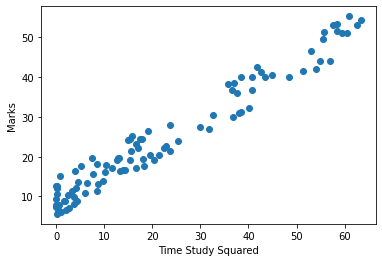

In [27]:
plt.scatter( data['time_study_squared'], data['Marks'])
plt.xlabel("Time Study Squared")
plt.ylabel("Marks")
plt.show()

In [28]:
#Splitting the dataset into X and y
X=data[["number_courses", "time_study", "time_study_squared"]]
y=np.array(data[["Marks"]]).reshape(-1,1)

In [29]:
#Building the model
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
#Predictions on the basis of model
y_pred=reg.predict(X)

In [31]:
#Find the R-Squared
r2_score(y, y_pred)

0.9996529294889802

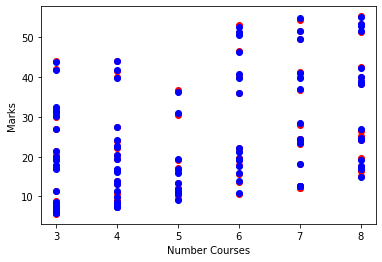

In [33]:
plt.scatter(X['number_courses'], y, color='red')
plt.scatter(X['number_courses'], y_pred, color='blue')
plt.xlabel("Number Courses")
plt.ylabel("Marks")
plt.show()

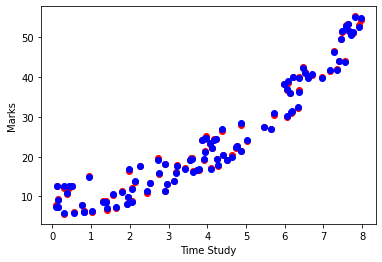

In [34]:
plt.scatter(X['time_study'], y, color='red')
plt.scatter(X['time_study'], y_pred, color='blue')
plt.xlabel("Time Study")
plt.ylabel("Marks")
plt.show()

In [35]:
#Calculate the beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[0.56299581]
[[ 1.70546941 -0.02855268  0.67346253]]


In [37]:
# Metrics to give an overall sense of error in the model
rss=np.sum(np.square(y-y_pred))
print(rss)
mse=mean_squared_error(y, y_pred)
print(mse)
rmse=mse**0.5
print(rmse)

7.0520412306838125
0.07052041230683813
0.2655567967626476


In [38]:
#Residuals analysis
y_res=y-y_pred

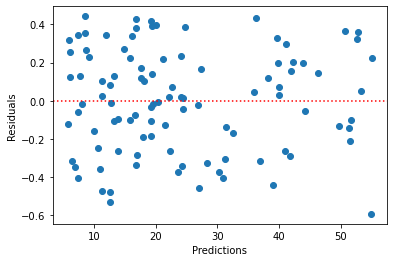

In [40]:
data['res']=y_res
plt.scatter(y_pred, data['res'])
plt.axhline(y=0, color='red', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

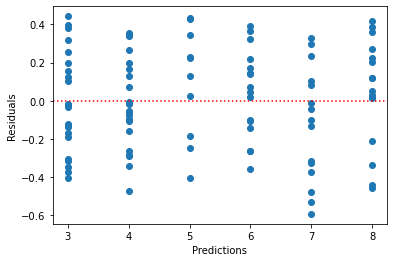

In [41]:
plt.scatter(data['number_courses'], data['res'])
plt.axhline(y=0, color='red', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

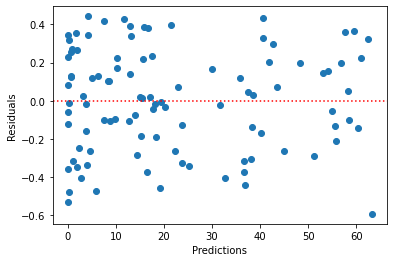

In [42]:
plt.scatter(data['time_study_squared'], data['res'])
plt.axhline(y=0, color='red', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

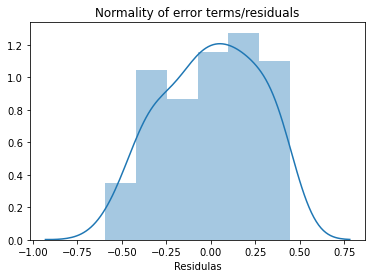

In [43]:
#Distribution of errors
p=sns.distplot(y_res, kde=True)
p=plt.title('Normality of error terms/residuals')
plt.xlabel("Residulas")
plt.show()

Now, this time our residuals is normally distributed with polynomial regression.